# Assignment 1

**Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
from sklearn.tree import DecisionTreeRegressor

**Reading the data**

In [2]:
df=pd.read_excel("DS - Assignment Part 1 data set.xlsx")

**Analyzing the data**

In [3]:
df.head() #.head() to get the first 5 rows of the dataframe

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
df.shape

(414, 9)

In [6]:
df['Transaction date'].value_counts()

2013.416667    58
2013.500000    47
2013.083333    46
2012.916667    38
2013.250000    32
2012.833333    31
2012.666667    30
2013.333333    29
2013.000000    28
2012.750000    27
2013.166667    25
2013.583333    23
Name: Transaction date, dtype: int64

In [7]:
df['House Age'].value_counts()

0.0     17
13.6     7
13.3     6
16.2     6
16.4     6
        ..
30.2     1
4.3      1
24.0     1
8.4      1
18.8     1
Name: House Age, Length: 236, dtype: int64

In [8]:
df['Distance from nearest Metro station (km)'].value_counts()

289.32480     13
90.45606      11
492.23130      9
1360.13900     8
104.81010      8
              ..
4527.68700     1
401.88070      1
432.03850      1
472.17450      1
390.96960      1
Name: Distance from nearest Metro station (km), Length: 259, dtype: int64

In [9]:
df['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [10]:
type(df['House price of unit area'][1])

numpy.float64

**Performing Exploratory Data Analysis(EDA) over the given data frame**

C:\Users\nihit\AppData\Local\Temp\ipykernel_3252\4101162920.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['House price of unit area'])


<AxesSubplot:xlabel='House price of unit area', ylabel='Density'>

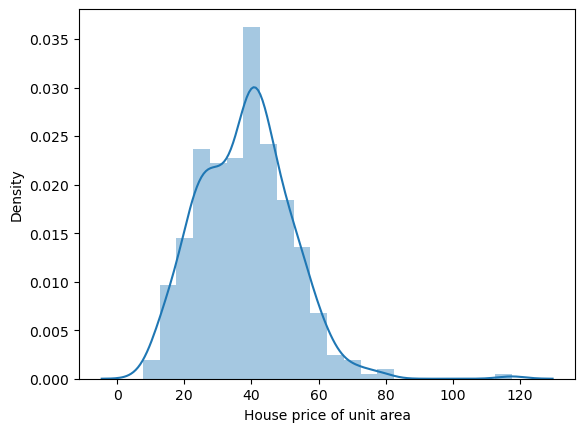

In [11]:
sns.distplot(a=df['House price of unit area'])

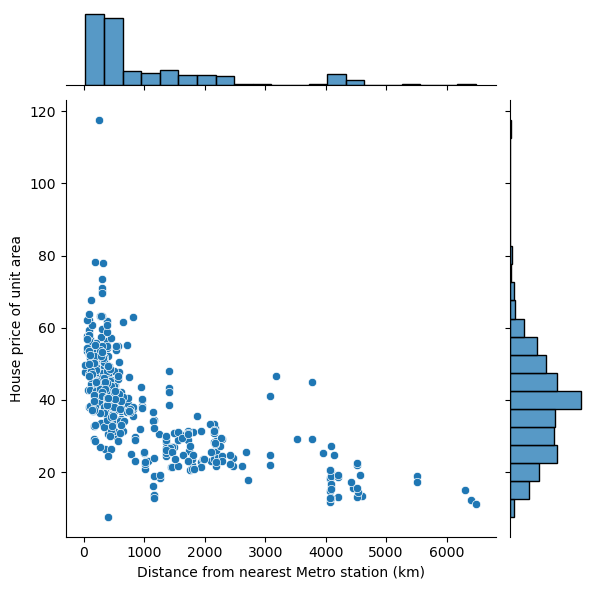

In [12]:
sns.jointplot(x='Distance from nearest Metro station (km)', y='House price of unit area', data=df)


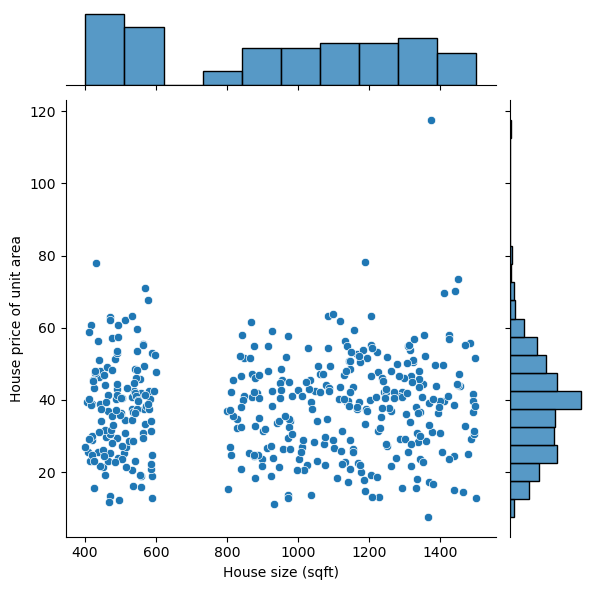

In [13]:
sns.jointplot(x='House size (sqft)', y='House price of unit area', data=df)

<AxesSubplot:xlabel='Number of convenience stores', ylabel='count'>

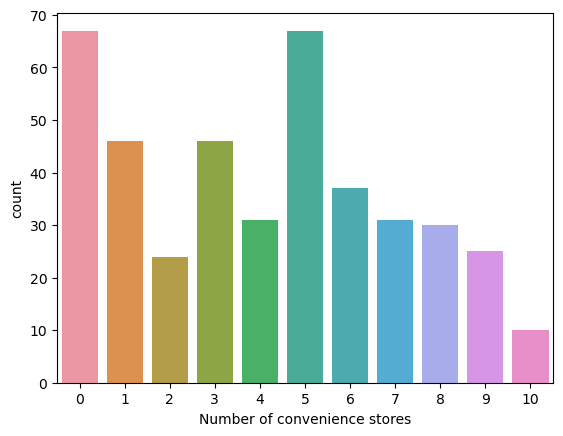

In [14]:
sns.countplot(x='Number of convenience stores', data=df)

**Replacing the float valued dates with its value_counts as there are only 12 categories of transaction dates**

In [15]:
df.replace(df['Transaction date'].value_counts().to_dict(),inplace=True)

**Performing Train_Test_Split over the data**

In [16]:
X=df.drop("House price of unit area",axis=1)
y=df['House price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Training and evaluating different machine learning models 

**Random Forest**

In [17]:
rand_forest_regressor = RandomForestRegressor(n_estimators=50)
rand_forest_regressor.fit(X_train, y_train)

y_rand_forest_predict = rand_forest_regressor.predict(X_test)

r2=r2_score((y_test),(y_rand_forest_predict))

random_forest_model_error = sqrt(mean_squared_error((y_test),(y_rand_forest_predict)))
print(f' Random Forest Mean Squared Error - {random_forest_model_error}')
print(f' Random Forest r2 Score -',r2)

 Random Forest Mean Squared Error - 6.832439427140749
 Random Forest r2 Score - 0.7089640028447683


**XGBoost**

In [18]:
XGB_model = XGBRegressor(learning_rate=0.3, max_depth=6, n_estimators=500)
XGB_model.fit(X_train, y_train)
y_XGB_predict = XGB_model.predict(X_test)

XGB_model_error = sqrt(mean_squared_error(y_test, y_XGB_predict))

r2_xgb=r2_score(y_test,y_XGB_predict)

print(f'XGBoost Mean Squared Error - {XGB_model_error}')
print(f'XGBoost r2 Score -',r2_xgb)

XGBoost Mean Squared Error - 6.890795331751531
XGBoost r2 Score - 0.7039712918585349


**Linear Regression**

In [19]:
linear_model=LinearRegression()
linear_model.fit(X_train, y_train)
linear_predict=linear_model.predict(X_test)

linear_error= sqrt(mean_squared_error(y_test, linear_predict))

linear_r2=r2_score(y_test,linear_predict)

print(f'Linear Regression Mean Squared Error - {linear_error}')
print(f'Linear Regression r2 Score -',linear_r2)

Linear Regression Mean Squared Error - 8.650890506967666
Linear Regression r2 Score - 0.5334300557264267


**Decision Tree**

In [20]:
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_predict=dt.predict(X_test)

dt_error=sqrt(mean_squared_error(y_test, dt_predict))

dt_r2=r2_score(y_test,dt_predict)

print(f'Decision Tree Mean Squared Error - {dt_error}')
print(f'Decision Tree r2 Score -',dt_r2)

Decision Tree Mean Squared Error - 9.096782939809799
Decision Tree r2 Score - 0.48409374626397306


# From the MSE and the r2_score from the different models, we can say that Random Forest and XGBoost give the best possible results